# What is Churn Analysis?  

Check to look for the behavior of buying something customers, determine customer who possible to abandon of customers you, we call churn analysis the process of predicting those who are most likely to abandon. You see how important is work of churn analysis if you consider that find a new customer harder and more cost than keep the existing customer. That analysis is been a tool that gives the decision of strategy and uses recently authority of plan.


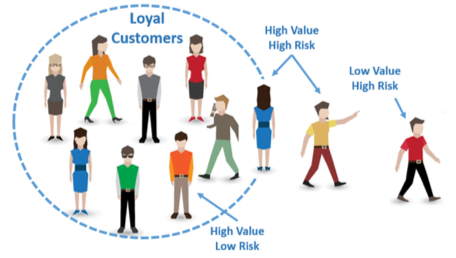




 # Churn for Bank Customers

 ## Content
 

*   RowNumber—corresponds to the record (row) number and has no effect on the output.
*   contains random values and has no effect on customer leaving the bank.
*   Surname—the surname of a customer has no impact on their decision to leave the bank.
*   CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
*   Geography—a customer’s location can affect their decision to leave the bank.
*   Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank
*   Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank
*   Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
*   NumOfProducts—refers to the number of products that a customer has purchased through the bank.
*   HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
*  IsActiveMember—active customers are less likely to leave the bank
*  EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

## Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

Data= https://www.kaggle.com/mathchi/churn-for-bank-customers 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")


In [ ]:
Data=pd.read_csv('../input/churn-for-bank-customers/churn.csv')

In [ ]:
Data.head()

In [ ]:
pandas_profiling.ProfileReport(Data, title="Pandas Profiling Report", explorative=True)

In [ ]:
plt.figure(figsize=(10,7)),
sns.heatmap(Data.corr(),vmin=0, vmax=1,annot=True);

In [ ]:
Data_reg=Data.copy().drop(columns=['RowNumber','CustomerId','Surname'])
Data_reg

In [ ]:
# How many unique values are in Columns of Data ?
for i in Data_reg.columns:
    if len(Data_reg[i].unique())<6:
      print(F'{i}:',len(Data_reg[i].unique()),'Values:',Data_reg[i].unique())
    else:
      print(F'{i}:',len(Data_reg[i].unique()))

In [ ]:
Data_reg.info()

In [ ]:
Data_reg.describe().T

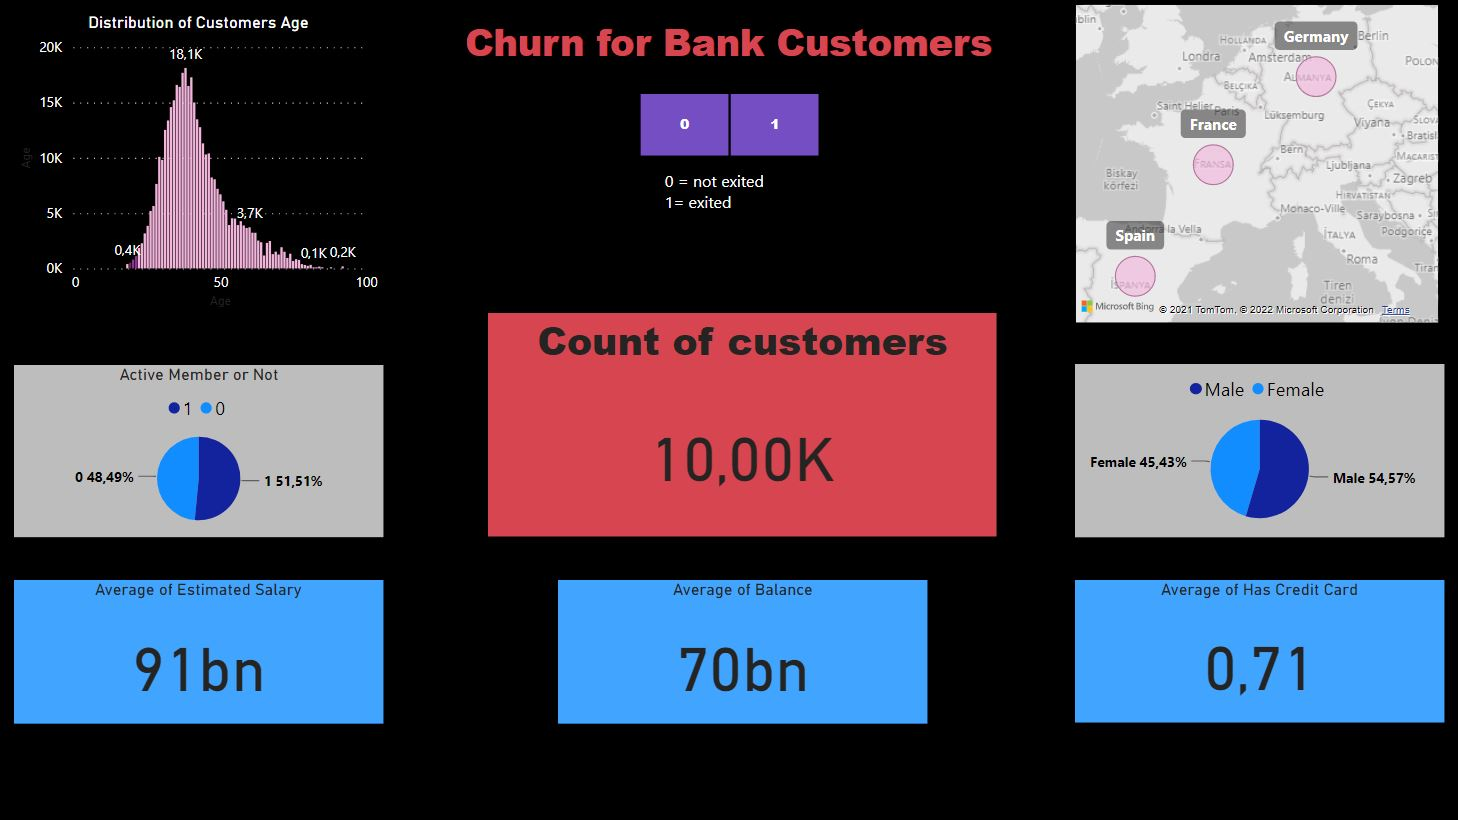

In [ ]:
#Old Data
Data_reg

In [ ]:
#New_ data
Data_reg['Gender']=pd.get_dummies(Data_reg['Gender'],drop_first=True)
Geography_dumies=pd.get_dummies(Data_reg['Geography'],drop_first=True)
Data_reg=Data_reg.drop(columns=['Geography'])
Data_reg=pd.concat([Data_reg,Geography_dumies],axis=1)
Data_reg

In [ ]:
x=Data_reg.copy().drop(columns=['Exited']).values
y=Data_reg['Exited'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
print('Train_x:',x_train.shape)
print('Train_y:',y_train.shape)
print('Test_x:',x_test.shape)
print('Test_y:',y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
obje_ss=StandardScaler()

x_train_ss=obje_ss.fit_transform(x_train)
x_test_ss=obje_ss.fit_transform(x_test)

# Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42,max_iter=10000)
model_le.fit(x_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print('Best parameters:',model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)
print('Logistic Regression Cros validation score:',model_le_grid.best_score_*100)

In [ ]:
model_le=LogisticRegression(random_state=42,C=0.8)
model_le.fit(x_train,y_train)
print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)

## Support Vector Classication

In [ ]:
from sklearn import svm

model_svc=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train_ss,y_train)
print('Best parameters:',model_svc_grid.best_params_)
print('Support Vecktor Classification Cros validation score:',model_svc_grid.best_score_*100)

In [ ]:
model_svc=svm.SVC(random_state=42,C=1,kernel='poly',degree=4)
model_svc.fit(x_train_ss,y_train)
print('Support Vecktor Classification Train score:',model_svc.score(x_train_ss,y_train)*100)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_rfc_grid.best_params_)

print('Random Forest Classifier Cros validation score:',model_rfc_grid.best_score_*100)

In [ ]:
model_rfc=RandomForestClassifier(n_jobs=-1,n_estimators=400,max_depth=6)
model_rfc.fit(x_train,y_train)
print('Random Forest Classifier Train score:',model_rfc.score(x_train,y_train)*100)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[50,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=10,verbose=1).fit(x_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)

In [ ]:
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=200,max_depth=3,learning_rate=0.1,eval_metric='logloss')
model_xgb.fit(x_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(x_train,y_train)*100)

## DNN

In [ ]:
model_dnn=tf.keras.Sequential()

model_dnn.add(tf.keras.layers.Dense(25,activation='relu',input_dim=11))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(10,activation='relu'))
model_dnn.add(tf.keras.layers.Dropout(0.3))
model_dnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model_dnn.summary()

In [ ]:
epoch=200
history=model_dnn.fit(x_train_ss,y_train,epochs=epoch,verbose=0)

In [ ]:
print('Loss:',history.history['loss'][-1])
print('Accuracy: %',history.history['accuracy'][-1]*100)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlim([0,epoch])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
from sklearn.metrics import classification_report

def test_score(model_name):
  for i in model_name: 
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test))}')

def test_score_ss(model_name):
  for i in model_name:
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test_ss))}') 

liste_test=[model_le,model_rfc,model_xgb]
liste_test_ss=[model_svc]

test_score(liste_test)
test_score_ss(liste_test_ss)

liste_dnn=[]
for i in model_dnn.predict(x_test_ss):
  if i<0.5:
    liste_dnn.append(0)
  else:
    liste_dnn.append(1)
print(f'{model_dnn.__class__} \n{classification_report(y_test,liste_dnn)}')